### Chapter 3 - Processing Images with OpenCV

Sooner or later, when working with images, you will find you need to alter them: be it by
applying artistic filters, extrapolating certain sections, blending two images, or whatever
else your mind can conjure. This chapter presents some techniques that you can use to alter
images. By the end of it, you should be able to perform tasks such as sharpening an image,
marking the contours of subjects, and detecting crosswalks using a line segment
detector. Specifically, our discussion and code samples will cover the following topics:

- Converting images between different color models.
- Understanding the importance of frequencies and the Fourier transform in image processing.
- Applying high-pass filters (HPFs), low-pass filters (LPFs), edge detection filters, and custom convolution filters.
- Detecting and analyzing contours, lines, circles, and other geometric shapes.
- Writing classes and functions that encapsulate the implementation of a filter.

In [33]:
import cv2, os
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

CWD = os.getcwd()

#### Converting images between different color models

In between input and output, when we apply computer vision techniques to
images, we will typically work with three kinds of color models: grayscale, blue-greenred
(BGR), and hue-saturation-value (HSV). Let's go over these briefly:

- **Grayscale** is a model that reduces color information by translating it into shades
of gray or brightness. This model is extremely useful for the intermediate
processing of images in problems where brightness information alone is
sufficient, such as face detection. Typically, each pixel in a grayscale image is
represented by a single 8-bit value, ranging from 0 for black to 255 for white.
- **BGR** is the blue-green-red color model, in which each pixel has a triplet of values
representing the blue, green, and red components or channels of the pixel's color.
Web developers, and anyone who works with computer graphics, will be
familiar with a similar definition of colors, except with the reverse channel order,
**red-green-blue (RGB)**. Typically, each pixel in a BGR image is represented by a
triplet of 8-bit values, such as `[0, 0, 0]` for black, `[255, 0, 0]` for blue, `[0, 255, 0]` 
for green, `[0, 0, 255]` for red, and `[255, 255, 255]` for white.
- The **HSV** model uses a different triplet of channels. Hue is the color's tone,
saturation is its intensity, and value represents its brightness.

By default, OpenCV uses the BGR color model (with 8 bits per channel) to represent any
image that it loads from a file or captures from a camera.

#### Light is not paint (this is very important to understand)
For newcomers to the BGR color space, it might seem that things do not add up properly:
for example, the `(0, 255, 255)` triplet (no blue, full green, and full red) produces the
color yellow. If you have an artistic background, you won't even need to pick up paints and
brushes to know that green and red paint mix together into a muddy shade of brown.
However, the color models that are used in computing are called **additive** models and they
deal with lights. Lights behave differently from paints (which follow a **subtractive** color
model), and since software runs on a computer whose medium is a monitor that emits
light, the color model of reference is the additive one.

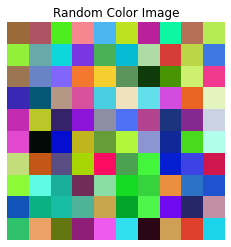

In [4]:
randomByteArray = bytearray(os.urandom(300))
flatNumpyArray = np.array(randomByteArray)
bgrImage = flatNumpyArray.reshape(10, 10, 3)

plt.title("Random Color Image")
plt.imshow(cv2.cvtColor(bgrImage, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

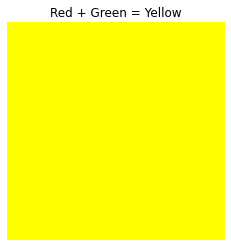

In [6]:
# Let's turn into no blue, full green and red -> yellow
# Yellow because of additive color mixing not paint mixing (red + green = brown)
bgrImage[:, :, 0] = 0
bgrImage[:, :, 1] = 255
bgrImage[:, :, 2] = 255

plt.title("Red + Green = Yellow")
plt.imshow(cv2.cvtColor(bgrImage, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

### Exploring the Fourier transform

#### HPFs and LPFs
An HPF is a filter that examines a region of an image and boosts the intensity of certain
pixels based on the difference in the intensity of the surrounding pixels.

In [39]:
from scipy import ndimage

In [40]:
kernel_3x3 = np.array([[-1, -1, -1],
                       [-1, 8, -1],
                       [-1, -1, -1]])

kernel_5x5 = np.array([[-1, -1, -1, -1, -1],
                       [-1, 1, 2, 1, -1],
                       [-1, 2, 4, 2, -1],
                       [-1, 1, 2, 1, -1],
                       [-1, -1, -1, -1, -1]])

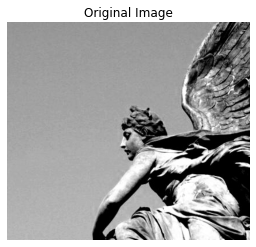

In [49]:
img = cv2.imread(CWD + "/opencv/images/statue_small.jpg", 0)

plt.title("Original Image")
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

In [42]:
k3 = ndimage.convolve(img, kernel_3x3) 
k5 = ndimage.convolve(img, kernel_5x5)

blurred = cv2.GaussianBlur(img, (17, 17), 0)
g_hpf = img - blurred

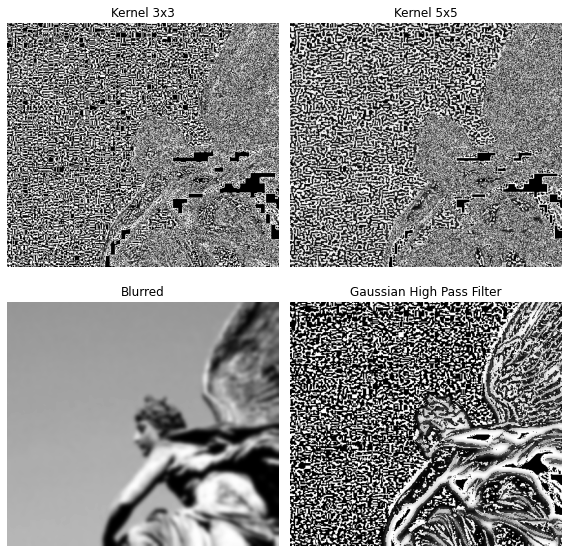

In [48]:
# Plot images in a 2x2 subplot
plt.figure(figsize=(8, 8))
plt.subplot(221)
plt.title("Kernel 3x3")
plt.imshow(k3, cmap="gray")
plt.axis("off")

plt.subplot(222)
plt.title("Kernel 5x5")
plt.imshow(k5, cmap="gray")
plt.axis("off")

plt.subplot(223)
plt.title("Blurred")
plt.imshow(blurred, cmap="gray")
plt.axis("off")

plt.subplot(224)
plt.title("Gaussian High Pass Filter")
plt.imshow(g_hpf, cmap="gray")
plt.axis("off")

plt.tight_layout()